## Import necesaary libraries

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## import dataset

In [200]:

data = pd.read_csv("censusData.csv")
data = pd.DataFrame(data)
data



,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,NORM POP,NORM INCCAP
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39,0.544919,0.195581
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46,0.722161,0.184409
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20,0.559255,0.342820
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17,0.382871,0.364406
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6,0.303133,0.607968
...,...,...,...,...,...,...,...,...,...,...,...
72,73,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48,0.246942,0.143063
73,74,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16,0.169566,0.325347
74,75,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30,0.205650,0.235472
75,76,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24,0.103306,0.219056


## Remove spaces between the Column Names

In [201]:
data.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
data

,Community_Area_Number,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16+_UNEMPLOYED,PERCENT_AGED_25+_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME_,HARDSHIP_INDEX,NORM_POP,NORM_INCCAP
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39,0.544919,0.195581
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46,0.722161,0.184409
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20,0.559255,0.342820
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17,0.382871,0.364406
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6,0.303133,0.607968
...,...,...,...,...,...,...,...,...,...,...,...
72,73,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48,0.246942,0.143063
73,74,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16,0.169566,0.325347
74,75,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30,0.205650,0.235472
75,76,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24,0.103306,0.219056


## To get index of targeted area name 

In [219]:
target_value = "Uptown"

# Use the .loc indexer to find the position of the target value
row_index, col_index = (data == target_value).values.nonzero()

print(row_index, col_index)


[] []


## Make a label class

In [203]:
def is_income(PER_CAPITA_INCOME_):
    if PER_CAPITA_INCOME_ >= 30000:
        return 'Yes'
    else:
        return 'No'
data["INCOME_STATUS"] = data["PER_CAPITA_INCOME_"].apply(is_income)
data

,Community_Area_Number,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16+_UNEMPLOYED,PERCENT_AGED_25+_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME_,HARDSHIP_INDEX,NORM_POP,NORM_INCCAP,INCOME_STATUS
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39,0.544919,0.195581,No
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46,0.722161,0.184409,No
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20,0.559255,0.342820,Yes
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17,0.382871,0.364406,Yes
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6,0.303133,0.607968,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48,0.246942,0.143063,No
73,74,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16,0.169566,0.325347,Yes
74,75,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30,0.205650,0.235472,No
75,76,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24,0.103306,0.219056,No


## Check Missing Values 

In [204]:
null_df = data.isnull()

total_null_values = null_df.sum().sum()
print(total_null_values)

0


## Covert categorical column to numeric 

In [205]:
data['COMMUNITY_AREA_NAME'] = pd.factorize(data['COMMUNITY_AREA_NAME'])[0]+1
data


,Community_Area_Number,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16+_UNEMPLOYED,PERCENT_AGED_25+_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME_,HARDSHIP_INDEX,NORM_POP,NORM_INCCAP,INCOME_STATUS
0,1,1,7.7,23.6,8.7,18.2,27.5,23939,39,0.544919,0.195581,No
1,2,2,7.8,17.2,8.8,20.8,38.5,23040,46,0.722161,0.184409,No
2,3,3,3.8,24.0,8.9,11.8,22.2,35787,20,0.559255,0.342820,Yes
3,4,4,3.4,10.9,8.2,13.4,25.5,37524,17,0.382871,0.364406,Yes
4,5,5,0.3,7.5,5.2,4.5,26.2,57123,6,0.303133,0.607968,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,73,1.1,16.9,20.8,13.7,42.6,19713,48,0.246942,0.143063,No
73,74,74,1.0,3.4,8.7,4.3,36.8,34381,16,0.169566,0.325347,Yes
74,75,75,0.8,13.2,15.0,10.8,40.3,27149,30,0.205650,0.235472,No
75,76,76,3.6,15.4,7.1,10.9,30.3,25828,24,0.103306,0.219056,No


## Exploration OF DataSet

In [206]:
data.head(15)
data.tail(10)
data.sample(30)

,Community_Area_Number,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16+_UNEMPLOYED,PERCENT_AGED_25+_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME_,HARDSHIP_INDEX,NORM_POP,NORM_INCCAP,INCOME_STATUS
2,3,3,3.8,24.0,8.9,11.8,22.2,35787,20,0.559255,0.342820,Yes
57,58,58,14.4,23.6,13.9,45.1,39.3,13089,84,0.444300,0.060745,No
41,42,42,2.9,30.7,23.4,16.5,36.1,18672,58,0.218156,0.130126,No
37,38,38,3.3,29.3,24.3,15.9,39.5,23472,57,0.199220,0.189777,No
34,35,35,1.8,29.6,18.2,14.3,30.7,23791,47,0.160627,0.193742,No
26,27,27,8.2,42.4,19.6,21.3,43.2,12961,83,0.184979,0.059154,No
68,69,69,3.6,29.6,23.0,16.5,41.0,17285,66,0.310818,0.112890,No
75,76,76,3.6,15.4,7.1,10.9,30.3,25828,24,0.103306,0.219056,No
49,50,50,1.5,21.6,22.8,13.1,38.6,20588,51,0.046519,0.153937,No
72,73,73,1.1,16.9,20.8,13.7,42.6,19713,48,0.246942,0.143063,No


## Normalization

In [207]:
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())
    
data.iloc[:, 0:9] = data.iloc[:, 0:9].apply(normalize)
data

,Community_Area_Number,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16+_UNEMPLOYED,PERCENT_AGED_25+_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME_,HARDSHIP_INDEX,NORM_POP,NORM_INCCAP,INCOME_STATUS
0,0.000000,0.000000,0.477419,0.381579,0.128205,0.300191,0.368421,0.195581,0.391753,0.544919,0.195581,No
1,0.013158,0.013158,0.483871,0.261278,0.131410,0.349904,0.657895,0.184409,0.463918,0.722161,0.184409,No
2,0.026316,0.026316,0.225806,0.389098,0.134615,0.177820,0.228947,0.342820,0.195876,0.559255,0.342820,Yes
3,0.039474,0.039474,0.200000,0.142857,0.112179,0.208413,0.315789,0.364406,0.164948,0.382871,0.364406,Yes
4,0.052632,0.052632,0.000000,0.078947,0.016026,0.038241,0.334211,0.607968,0.051546,0.303133,0.607968,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.947368,0.947368,0.051613,0.255639,0.516026,0.214149,0.765789,0.143063,0.484536,0.246942,0.143063,No
73,0.960526,0.960526,0.045161,0.001880,0.128205,0.034417,0.613158,0.325347,0.154639,0.169566,0.325347,Yes
74,0.973684,0.973684,0.032258,0.186090,0.330128,0.158700,0.705263,0.235472,0.298969,0.205650,0.235472,No
75,0.986842,0.986842,0.212903,0.227444,0.076923,0.160612,0.442105,0.219056,0.237113,0.103306,0.219056,No


## Remove Un-necessary column 

In [208]:
data = data.drop('NORM_INCCAP', axis=1)
data

,Community_Area_Number,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16+_UNEMPLOYED,PERCENT_AGED_25+_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME_,HARDSHIP_INDEX,NORM_POP,INCOME_STATUS
0,0.000000,0.000000,0.477419,0.381579,0.128205,0.300191,0.368421,0.195581,0.391753,0.544919,No
1,0.013158,0.013158,0.483871,0.261278,0.131410,0.349904,0.657895,0.184409,0.463918,0.722161,No
2,0.026316,0.026316,0.225806,0.389098,0.134615,0.177820,0.228947,0.342820,0.195876,0.559255,Yes
3,0.039474,0.039474,0.200000,0.142857,0.112179,0.208413,0.315789,0.364406,0.164948,0.382871,Yes
4,0.052632,0.052632,0.000000,0.078947,0.016026,0.038241,0.334211,0.607968,0.051546,0.303133,Yes
...,...,...,...,...,...,...,...,...,...,...,...
72,0.947368,0.947368,0.051613,0.255639,0.516026,0.214149,0.765789,0.143063,0.484536,0.246942,No
73,0.960526,0.960526,0.045161,0.001880,0.128205,0.034417,0.613158,0.325347,0.154639,0.169566,Yes
74,0.973684,0.973684,0.032258,0.186090,0.330128,0.158700,0.705263,0.235472,0.298969,0.205650,No
75,0.986842,0.986842,0.212903,0.227444,0.076923,0.160612,0.442105,0.219056,0.237113,0.103306,No


## cor Relation

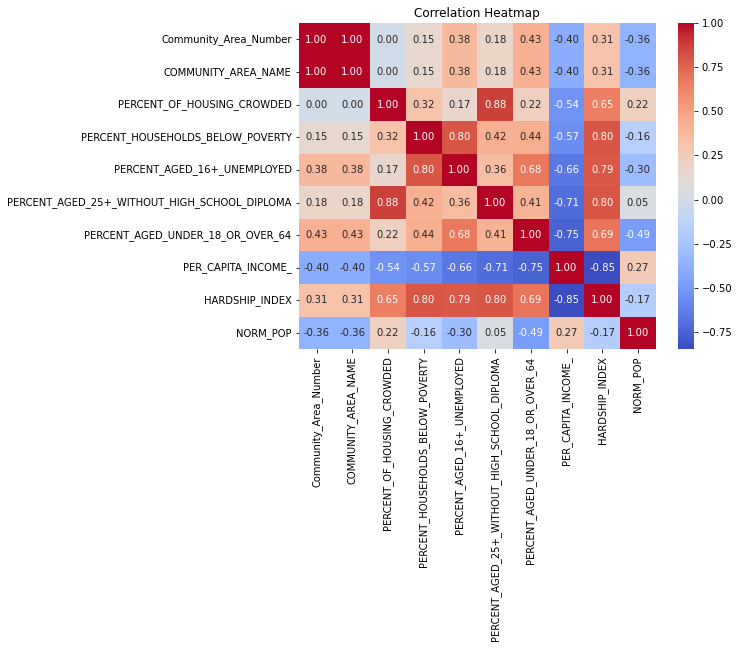

In [209]:
correlation_matrix = data.corr()

# Create a correlation heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# To Check Outliers

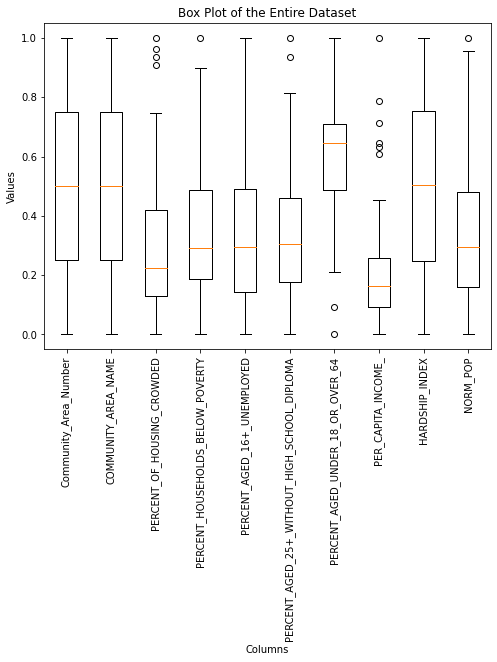

In [210]:
boxData = data.iloc[:, :10]

plt.figure(figsize=(8, 6))  
plt.boxplot(boxData.values, labels=boxData.columns)
plt.xticks(rotation=90)
plt.title('Box Plot of the Entire Dataset')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

## Splitting

In [211]:



np.random.seed(123)

indices = np.random.choice(data.shape[0], size=int(data.shape[0] * 0.7), replace=False)

train_loan = data.iloc[indices]
test_loan = data.drop(indices)

train_loan_labels = train_loan['INCOME_STATUS']
test_loan_labels = test_loan['INCOME_STATUS']

n_train = train_loan.shape[0]
n_test = test_loan.shape[0]

print("Number of rows in training set:", n_train)
print("Number of rows in test set:", n_test)


Number of rows in training set: 53
Number of rows in test set: 24


## KNN

In [212]:
k_values = [1,2,3,4,5,6,7,8,9,10]
knn_models = []
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(train_loan.drop(columns=['INCOME_STATUS']), train_loan['INCOME_STATUS'])
    predictions = knn.predict(test_loan.drop(columns=['INCOME_STATUS']))
    
    accuracy =  sum(test_loan_labels == predictions) / len(test_loan_labels)

    
    knn_models.append(knn)
    accuracies.append(accuracy)

for i, k in enumerate(k_values):
    print(f'k={k}: Accuracy = {accuracies[i] * 100:.2f}%')
    



k=1: Accuracy = 95.83%
k=2: Accuracy = 87.50%
k=3: Accuracy = 91.67%
k=4: Accuracy = 91.67%
k=5: Accuracy = 91.67%
k=6: Accuracy = 87.50%
k=7: Accuracy = 87.50%
k=8: Accuracy = 87.50%
k=9: Accuracy = 91.67%
k=10: Accuracy = 87.50%


## confusion matrix

In [213]:
conf_matrix = confusion_matrix(test_loan["INCOME_STATUS"], predictions)

# Display the confusion matrix
print(conf_matrix)

[[19  0]
 [ 3  2]]


## Accuracy Graph

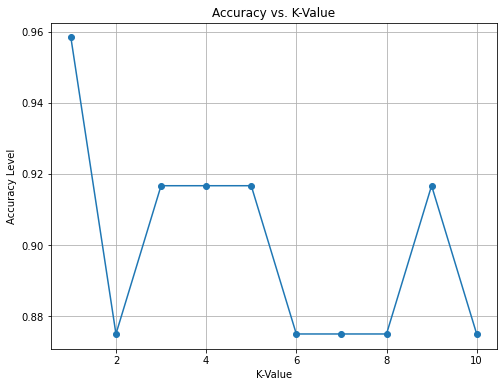

In [214]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel('K-Value')
plt.ylabel('Accuracy Level')
plt.title('Accuracy vs. K-Value')
plt.grid(True)

plt.show()

## Precision

In [215]:
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

print("Precision:", round(precision, 2))

Precision: 1.0


## F1 Score 

In [216]:

f1 = f1_score(test_loan_labels, predictions,pos_label='Yes')

print(f'F1 Score: {f1:.2f}')

F1 Score: 0.57


## Recall 

In [217]:
recall = recall_score(test_loan_labels,predictions,pos_label="Yes")

print("Recall:", recall)


Recall: 0.4


### Is income of a person living in Edgewater , PERCENT AGED 16+ UNEMPLOYED is 0.2  and  PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA is 0.8 is above 30000 or not ? 

In [218]:
data2 = data[["COMMUNITY_AREA_NAME","PERCENT_AGED_16+_UNEMPLOYED","PERCENT_AGED_25+_WITHOUT_HIGH_SCHOOL_DIPLOMA",
              "INCOME_STATUS"]]
if((row_index != []) and (col_index != [])):
    Value = data.iloc[row_index[0],col_index[0]]
else:
    Value = 0

    
target = pd.DataFrame({
    "COMMUNITY_AREA_NAME": [Value] ,
    "PERCENT_AGED_16+_UNEMPLOYED": [0.5],
    "PERCENT_AGED_25+_WITHOUT_HIGH_SCHOOL_DIPLOMA": [0.9]
})
np.random.seed(123)

indices = np.random.choice(data2.shape[0], size=int(data2.shape[0] * 0.7), replace=False)

train_loan = data2.iloc[indices]
test_loan = data2.drop(indices)

train_loan_labels = train_loan['INCOME_STATUS']
test_loan_labels = test_loan['INCOME_STATUS']
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(train_loan.drop(columns=['INCOME_STATUS']), train_loan['INCOME_STATUS'])
predictions = knn.predict(target)
       
print("Person living in {} have {} income more than 30000  ".format(target_value,predictions[0]))

Person living in pakistan have No income more than 30000  


C:\Users\Hamza\AppData\Local\Temp\ipykernel_3200\2162301544.py:3: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if((row_index != []) and (col_index != [])):


## Github Link

In [ ]:
https://github.com/HamzaGujjar579/DataScience-Project